# Nucleosynthesis: Modelling of the Sun.

## Step 0: Preparations.

In [1]:
# Import necessary modules and libraries.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# Several key parameters.
NA = 6.022e23
ne0 = 7.6e25   

## Step 1: Main Sequence of the Sun.
- Firstly we extract T(t) and rho(t) of MS of Sun from MESA, see Ref [1].

In [2]:
t_MS = np.array([3.15400000e+02, 2.34708064e+03, 8.18736833e+03, 2.27198730e+04,
        5.88813952e+04, 1.48862834e+05, 3.72765447e+05, 9.29906799e+05,
        2.31625276e+06, 5.76592514e+06, 1.43498140e+07, 3.57092761e+07,
        8.88584532e+07, 2.21110613e+08, 5.50196307e+08, 1.36906683e+09,
        3.40667870e+09, 8.47690910e+09, 2.10932648e+10, 5.24867952e+10,
        1.30603944e+11, 3.24984410e+11, 8.08665206e+11, 2.01221781e+12,
        5.00704183e+12, 1.24591223e+13, 3.10022832e+13, 7.71436015e+13,
        1.68729650e+14, 2.93754522e+14, 4.48686353e+14, 6.26641132e+14,
        8.19131339e+14, 1.15716539e+15, 1.99830229e+15, 4.09132004e+15,
        9.29941799e+15, 2.22588323e+16, 4.53139258e+16, 6.63788717e+16,
        8.69151593e+16, 1.06956212e+17, 1.26432057e+17, 1.45260095e+17,
        1.63364568e+17, 1.80689541e+17, 1.97178733e+17, 2.12710589e+17,
        2.27265689e+17, 2.40078201e+17, 2.48751278e+17, 2.55338726e+17,
        2.61026835e+17, 2.66192997e+17, 2.70976098e+17, 2.75432788e+17,
        2.79589471e+17, 2.83463475e+17, 2.87070798e+17, 2.90427907e+17,
        2.93552242e+17, 2.96460201e+17, 2.99170316e+17, 3.01696264e+17,
        3.04051912e+17, 3.06251790e+17, 3.08308841e+17, 3.09859630e+17])  # t in seconds

T_MS = np.array([ 4193556.78238264,  4193556.78926517,  4193556.80837239,
         4193556.83620694,  4193556.87586608,  4193556.93072328,
         4193557.00296777,  4193557.09289475,  4193557.20094267,
         4193557.33632256,  4193557.53696479,  4193557.93423828,
         4193558.90012772,  4193561.30468861,  4193567.28806126,
         4193582.17646436,  4193619.2226116 ,  4193711.39924413,
         4193940.72678493,  4194511.13563691,  4195929.06548277,
         4199448.50978146,  4208152.74175886,  4229482.95254831,
         4280599.63349052,  4396939.83687512,  4636844.72615946,
         5072900.36213771,  5695563.7546347 ,  6433688.26068569,
         7432833.99318589,  8920794.15866744, 11227083.78083386,
        13628693.63121029, 13608183.86456236, 13587982.72344312,
        13630831.07228613, 13777406.61387227, 14056675.74596504,
        14337151.56034287, 14638154.37577485, 14962483.2251024 ,
        15311877.02279773, 15688584.35862349, 16093027.66311741,
        16527254.05662823, 16995740.79849428, 17486881.47946294,
        18027850.10943097, 18488457.70989186, 18675065.62552441,
        18738128.91122589, 18760237.5770754 , 18768338.55717096,
        18774642.14770271, 18781126.36079877, 18791373.59096955,
        18804108.45146665, 18819546.38876946, 18836425.03187551,
        18855813.74718263, 18874659.21389191, 18895802.84429321,
        18917814.26121215, 18940017.03956811, 18962352.8098699 ,
        18984968.14238863, 19002495.59599141])                        # T in K.

rho_MS = np.array([  1.39584697,   1.39584697,   1.39584698,   1.39584699,
          1.39584702,   1.39584704,   1.39584708,   1.39584714,
          1.39584721,   1.39584732,   1.39584752,   1.39584798,
          1.3958491 ,   1.3958519 ,   1.39585887,   1.39587622,
          1.39591937,   1.39602676,   1.39629398,   1.39695891,
          1.39861355,   1.40273134,   1.41298142,   1.43850836,
          1.50216737,   1.66166695,   2.06706204,   3.14298681,
          5.68506543,  10.43720775,  19.61025567,  38.05363067,
         70.01165536,  78.21922781,  79.48209826,  82.69182275,
         84.79254541,  88.7710978 ,  96.5555808 , 104.81427615,
        114.20647588, 124.97380623, 137.38343228, 151.71718195,
        168.38703485, 187.85328681, 210.6666307 , 236.28576558,
        267.46697655, 302.72112322, 332.50414948, 358.24035281,
        382.72884669, 407.03787467, 431.45689191, 456.26198213,
        481.55882827, 507.40563091, 533.75409075, 560.64152736,
        588.03952572, 615.8606101 , 644.16892439, 672.86565715,
        701.93959852, 731.40680454, 761.17231542, 785.32249953])    # rho in g/cm3

rho_MS_0 = rho_MS[0]


T_of_t = interp1d(t_MS, T_MS, kind='linear', fill_value='extrapolate')
rho_of_t = interp1d(t_MS, rho_MS, kind='linear', fill_value='extrapolate')

- Secondly we express rate of reactions within CNO, pp chains and triple alpha w.r.t T, using the data from Ref [2].

In [3]:
######################
# A) CNO cycles.
######################

#CNO1 cycles

def CNO1_cycle(elements, elemChart, t):
    """
    Construct the differential equations for systems of the CNO1 cycle.

    Parameters
    ----------
    elements : np.array
        Numpy array containing the number densities of the elements.
    elemChart : dict
        Dictionary containing the positions of the elements in the elements array.
    temp : float
        Temperature of the system in K.

    Returns
    -------
    dX : dict
        The differential equations for the system.
    """
    temp = T_of_t(t)
    rho_now = rho_of_t(t)

    t9 = temp / 1e9  # convert to 10^9 K
    rho_factor = rho_now / rho_MS_0

    sigma_v_expectation = {
        "C12(p,g)N13": (
            (2.04e7 / (t9**(2/3)) * np.exp(-13.690 / (t9**(1/3)) - (t9 / 1.500)**2)
             * (1 + 0.030 * t9**(1/3) + 1.19 * t9**(2/3) + 0.254 * t9 + 2.06 * t9**(4/3) + 1.12 * t9**(5/3))
             + 1.08e5 * t9**(-3/2) * np.exp(-4.925 / t9)
             + 2.15e05 * t9**(-3/2) * np.exp(-18.179 / t9)
            )
        ),
        "C13(p,g)N14": (
            (8.01e7 / (t9**(2/3)) * np.exp(-13.717 / (t9**(1/3)) - (t9 / 2)**2)
             * (1 + 0.030 * t9**(1/3) + 0.958 * t9**(2/3) + 0.204 * t9 + 1.39 * t9**(4/3) + 0.753 * t9**(5/3))
             + 1.21e6 * t9**(-6/5) * np.exp(-5.701 / t9)
            )
        ),
        "N14(p,g)O15": (
            (4.90e7 / (t9**(2/3)) * np.exp(-15.228 / (t9**(1/3)) - (t9 / 3.294)**2)
             * (1 + 0.027 * t9**(1/3) - 0.778 * t9**(2/3) - 0.149 * t9 + 0.261 * t9**(4/3) + 0.127 * t9**(5/3))
             + 2.37e3 * t9**(-3/2) * np.exp(-3.011 / t9)
             + 2.19e4 * np.exp(-12.530 / t9)
            )
        ),
        "N15(p,a)C12": (
            (1.08e12 / (t9**(2/3)) * np.exp(-15.251 / (t9**(1/3)) - (t9 / 0.522)**2)
             * (1 + 0.027 * t9**(1/3) + 2.62 * t9**(2/3) + 0.501 * t9 + 5.36 * t9**(4/3) + 2.60 * t9**(5/3))
             + 1.19e8 * t9**(-3/2) * np.exp(-3.676 / t9)
             + 5.41e08 * t9**(-1/2) * np.exp(-8.926 / t9)
             + 0.5 * 4.72e08 * t9**(-3/2) * np.exp(-7.721 / t9)
             + 2.20e09 * t9**(-3/2) * np.exp(-11.418 / t9)
            )
        )
    }

    C12toC13 = sigma_v_expectation["C12(p,g)N13"] * elements[elemChart["C12"]] * elements[elemChart["H1"]] * rho_factor**2 / NA
    C13toN14 = sigma_v_expectation["C13(p,g)N14"] * elements[elemChart["C13"]] * elements[elemChart["H1"]] * rho_factor**2 / NA
    N14toN15 = sigma_v_expectation["N14(p,g)O15"] * elements[elemChart["N14"]] * elements[elemChart["H1"]] * rho_factor**2 / NA
    N15toC12 = sigma_v_expectation["N15(p,a)C12"] * elements[elemChart["N15"]] * elements[elemChart["H1"]] * rho_factor**2 / NA

    dX = {
        'H1': -C12toC13 - N15toC12 - C13toN14 - N14toN15,
        'He4': N15toC12,
        'C12': N15toC12 - C12toC13,
        'C13': C12toC13 - C13toN14,
        'N14': C13toN14 - N14toN15,
        'N15': N14toN15 - N15toC12
    }

    return dX


#CNO2 cycles

def CNO2_cycle(elements, elemChart, t):
    """
    Construct the differential equations for systems of the CNO1 cycle.

    Parameters
    ----------
    elements : np.array
        Numpy array containing the number densities of the elements.
    elemChart : dict
        Dictionary containing the positions of the elements in the elements array.
    temp : float
        Temperature of the system in K.

    Returns
    -------
    dX : dict
        The differential equations for the system.
    """
    temp = T_of_t(t)
    rho_now = rho_of_t(t)

    t9 = temp/1e9 # convert to 10^9 K
    rho_factor = rho_now/rho_MS_0

    sigma_v_expectation = {
    "N14(p,g)O15": (
        (4.90e7 / (t9**(2/3))
         * np.exp(-15.228 / (t9**(1/3)) - (t9 / 3.294)**2)
         * (1 + 0.027 * t9**(1/3)
            - 0.778 * t9**(2/3)
            - 0.149 * t9
            + 0.261 * t9**(4/3)
            + 0.127 * t9**(5/3))
         + 2.37e3 * t9**(-3/2) * np.exp(-3.011 / t9)
         + 2.19e4 * np.exp(-12.530 / t9)
        )
    ),
    "N15(p,g)O16": (
        (9.78e8 / (t9**(2/3))
         * np.exp(-15.251 / (t9**(1/3)) - (t9 / 0.450)**2)
         * (1 + 0.027 * t9**(1/3)
            + 0.219 * t9**(2/3)
            + 0.042 * t9
            + 6.83 * t9**(4/3)
            + 3.32 * t9**(5/3))
         + 1.11e04 * t9**(-3/2) * np.exp(-3.328 / t9)
         + 1.49e04 * t9**(-3/2) * np.exp(-4.665 / t9)
        )
    ),
    "O16(p,g)F17": (
        (1.50e8
         / (t9**(2/3) * (1 + 2.13 * (1 - np.exp(-0.728 * t9**(2/3))))))
        * np.exp(-16.692 / (t9**(1/3)))
    ) * rho_factor**2,
    "O17(p,a)N14": (
        1.53e7 / (t9**(2/3))
        * np.exp(-16.712 / (t9**(1/3)) - (t9 / 0.565)**2)
    )
}

    N14toN15 = sigma_v_expectation["N14(p,g)O15"] * elements[elemChart["N14"]] * elements[elemChart["H1"]] * rho_factor**2 / NA
    N15toO16 = sigma_v_expectation["N15(p,g)O16"] * elements[elemChart["N15"]] * elements[elemChart["H1"]] * rho_factor**2 / NA
    O16toO17 = sigma_v_expectation["O16(p,g)F17"] * elements[elemChart["O16"]] * elements[elemChart["H1"]] * rho_factor**2 / NA
    O17toN14 = sigma_v_expectation["O17(p,a)N14"] * elements[elemChart["O17"]] * elements[elemChart["H1"]] * rho_factor**2 / NA

    dX = {
        "H1": -N14toN15 - N15toO16 - O16toO17 - O17toN14,
        "He4": O17toN14,
        "N14": O17toN14 - N14toN15,
        "N15": N14toN15 - N15toO16,
        "O16": N15toO16 - O16toO17,
        "O17": O16toO17 - O17toN14
    }

    return dX


##############################
# B) Proton-Proton (PP) Chains.
##############################

lambda_b8_decay = np.log(2) / 0.77

def PP_chain_cycle(elements, elemChart, t):
    """
    Construct the differential equations for the pp-chain reaction network.

    Parameters
    ----------
    elements : np.array
        Array containing the number densities of the elements.
    elemChart : dict
        Dictionary mapping element names to positions in the elements array.
        Expected keys: 'H1', 'H2', 'He3', 'He4', 'Be7', 'Li7', 'B8'
    temp : float, optional
        Temperature of the system in K (default is 15e6 K).

    Returns
    -------
    dX : dict
        Dictionary containing the time derivatives of the element abundances,
        keyed by the element names.
    """
    # Convert temperature to T9 (10^9 K)
    temp = T_of_t(t)
    rho_now = rho_of_t(t)

    T9 = temp / 1e9
    rho_factor = rho_now / rho_MS_0

    # Extract current abundances (ensuring they are non-negative)
    H1  = max(elements[elemChart["H1"]], 0.0)
    H2  = max(elements[elemChart["H2"]], 0.0)
    He3 = max(elements[elemChart["He3"]], 0.0)
    He4 = max(elements[elemChart["He4"]], 0.0)
    Be7 = max(elements[elemChart["Be7"]], 0.0)
    Li7 = max(elements[elemChart["Li7"]], 0.0)
    B8  = max(elements[elemChart["B8"]], 0.0)

    # Assume a constant electron density
    ne = 7.6e25

    # Compute sigma*v expectation values (not final reaction rates yet)
    sigma_v_expectation = {
        "pp": 4.01e-15 * T9**(-2/3) * np.exp(-3.380 * T9**(-1/3)) / NA,
        "dp": 2.24e3 * T9**(-2/3) * np.exp(-3.720 * T9**(-1/3)) / NA,
        "33": 6.04e10 * T9**(-2/3) * np.exp(-12.276 * T9**(-1/3)) / NA,
        "34": 5.61e6 * (T9 / (1 + 4.95e-2 * T9))**(5/6) / (T9**(3/2)) * np.exp(-12.826 / ((T9 / (1 + 4.95e-2 * T9))**(1/3))) / NA,
        "EC": 1.34e-10 * T9**(-1/2) / NA,
        "li7p": 1.096e9 * T9**(-2/3) * np.exp(-8.472 * T9**(-1/3)) / NA,
        "be7p": 3.11e5 * T9**(-2/3) * np.exp(-10.262 * T9**(-1/3)) / NA
    }

    # Compute reaction rates using the expectation values
    r_pp   = H1 * H1 * sigma_v_expectation["pp"] * rho_factor**2
    r_dp   = H2 * H1 * sigma_v_expectation["dp"] * rho_factor**2
    r_33   = He3 * He3 * sigma_v_expectation["33"] * rho_factor**2
    r_34   = He3 * He4 * sigma_v_expectation["34"] * rho_factor**2
    r_EC   = Be7 * ne * sigma_v_expectation["EC"] * rho_factor**2
    r_li7p = Li7 * H1 * sigma_v_expectation["li7p"] * rho_factor**2
    r_be7p = Be7 * H1 * sigma_v_expectation["be7p"] * rho_factor**2
    r_b8   = B8 * lambda_b8_decay * rho_factor**2

    # Construct differential equations for each species
    dH1_dt  = -2 * r_pp - r_dp - r_be7p - r_li7p + 2 * r_33
    dH2_dt  =  r_pp - r_dp
    dHe3_dt =  r_dp - 2 * r_33 - r_34
    dHe4_dt =  r_33 + 2 * r_li7p + 2 * r_b8 - r_34
    dBe7_dt =  r_34 - r_EC - r_be7p
    dLi7_dt =  r_EC - r_li7p
    dB8_dt  =  r_be7p - r_b8

    dX = {
        "H1":  dH1_dt,
        "H2":  dH2_dt,
        "He3": dHe3_dt,
        "He4": dHe4_dt,
        "Be7": dBe7_dt,
        "Li7": dLi7_dt,
        "B8":  dB8_dt
    }

    return dX


##########################
# C) Triple-Alpha Process.
##########################

def triple_alpha(elements, elemChart, t):
    """
    Construct the differential equations for the triple-alpha process.

    Parameters
    ----------
    elements : np.array
        Array containing the number densities of the elements.
    elemChart : dict
        Dictionary mapping element names to positions in the elements array.
        Expected keys: 'He4', 'Be8', 'C12'
    temp : float, optional
        Temperature of the system in K.

    Returns
    -------
    dX : dict
        Dictionary containing the time derivatives of the element abundances,
        keyed by the element names.
    """
    temp = T_of_t(t)
    rho_now = rho_of_t(t)

    t9 = temp / 1e9  # convert to 10^9 K
    rho_factor = rho_now / rho_MS_0

    # Compute sigma*v expectation values (not final reaction rates yet)
    sigma_v_expectation = {
        "HeBe": (
            (7.40e-5 * t9**(-1.5) * np.exp(-1.0663 / t9)) +
            4.164e9 * t9**(-2/3) * np.exp(-13.490 * t9 ** (-1/3) - (t9 / 0.098)**2)
            * (1 + 0.031*t9**(1/3) + 8.009*t9**(2/3) + 1.732*t9 + 49.883*t9**(4/3) + 27.426*t9**(5/3))
        ),
        "BeHe": (
            1.40e10 * t9 ** (3/2) * np.exp(1.0663 / t9)
        ),
        "BeC": (
            (1.30e2 * t9 ** (-1.5) * np.exp(-3.3364 / t9)) +
            2.510e7 * t9 ** (-2/3) * np.exp(-23.570 * t9 ** (-1/3) - (t9 / 0.235) ** 2)
        ),
        "CO": (
    (1.04e8 / t9**2 / (1 + 0.0489 * t9**(-2/3))**2) * np.exp(-32.120 * t9**(-1/3) - (t9 / 3.496)**2)
    +
    (1.76e8 / t9**2 / (1 + 0.2654 * t9**(-2/3))**2) * np.exp(-32.120 * t9**(-1/3))
    +
    (1.25e3 / t9**(3/2)) * np.exp(-27.499 / t9)
    +
    (1.43e-2 * t9**5) * np.exp(-15.541 / t9)
)

    }

    He4_to_Be8 = sigma_v_expectation["HeBe"] * elements[elemChart["He4"]]**2 * rho_factor**2 / NA
    Be8_to_He4 = sigma_v_expectation["BeHe"] * elements[elemChart["Be8"]] * rho_factor**2 / NA
    Be8_to_C12 = sigma_v_expectation["BeC"] * elements[elemChart["Be8"]] * elements[elemChart["He4"]] * rho_factor**2 / NA

    lambda_Be = np.log(2) / 8.19e-17

    dX = {
        "He4": -2 * He4_to_Be8 + 2 * Be8_to_He4 - Be8_to_C12,
        "Be8": He4_to_Be8 - Be8_to_He4 - Be8_to_C12 - lambda_Be * elements[elemChart["Be8"]],
        "C12": Be8_to_C12
    }

    return dX

- Thirdly we define a set of ODEs to be solved.

In [4]:
def diffEqs(t, elements, elemChart):
    """
    Differential equations governing the nuclear reaction networks.
    """
    dCNO1 = CNO1_cycle(elements, elemChart, t)
    dCNO2 = CNO2_cycle(elements, elemChart, t)
    dtriple_alpha = triple_alpha(elements, elemChart, t)
    dpp_chain = PP_chain_cycle(elements, elemChart, t)

    # Ensure dX is initialized as a numpy array
    dX = np.zeros_like(elements)

    # Directly assign the scalar derivatives without summation
    for key in dCNO1.keys():
        dX[elemChart[key]] = dCNO1[key]

    for key in dCNO2.keys():
        dX[elemChart[key]] = dCNO2[key]

    for key in dtriple_alpha.keys():
        dX[elemChart[key]] = dtriple_alpha[key]

    for key in dpp_chain.keys():
        dX[elemChart[key]] = dpp_chain[key]
    
    dX[np.abs(dX) < 1e-30] = 0.0

    return dX

- Then, solve the ODEs using initial abundance of the Sun.

In [5]:
# Look up table for the elements to make our lives easier
elemChart = {
    'H1': 0,
    'H2': 1,
    'He3': 2,
    'He4': 3,
    'Li7': 4,
    'Be7': 5,
    'Be8': 6,
    'B8': 7,
    'C12': 8,
    'C13': 9,
    'N14': 10,
    'N15': 11,
    'O16': 12,
    'O17': 13,
}

initialAbundances = np.zeros(len(elemChart))

H1_val = 1.0e25  # Normalized hydrogen number density

initialAbundances[elemChart['H1']] = H1_val
initialAbundances[elemChart['H2']] = H1_val * 2.0e-5         # Deuterium ~2e-5 of H1.
initialAbundances[elemChart['He3']] = H1_val * 1.0e-5        # Very low abundance.
initialAbundances[elemChart['He4']] = H1_val * 0.085         # Solar He/H ratio ~0.085.
initialAbundances[elemChart['Li7']] = H1_val * 1.0e-9        # Lithium is extremely rare.
initialAbundances[elemChart['Be7']] = H1_val * 1.0e-11       # Very scarce.
initialAbundances[elemChart['Be8']] = 0.0                    # 8Be is unstable.
initialAbundances[elemChart['B8']] = H1_val * 1.0e-12        # Boron is also very low.
initialAbundances[elemChart['C12']] = H1_val * 2.7e-4   # Solar C/H ~2.7e-4.
initialAbundances[elemChart['C13']] = H1_val * 3.0e-6  # C13 is much lower.
initialAbundances[elemChart['N14']] = H1_val * 6.8e-5   # Solar N/H ~6.8e-5.
initialAbundances[elemChart['N15']] = H1_val * 2.3e-7   # N15 is even lower.
initialAbundances[elemChart['O16']] = H1_val * 4.9e-4   # Solar O/H ~4.9e-4.
initialAbundances[elemChart['O17']] = H1_val * 1.9e-7   # O17 is very low.


t_start = 0.0
t_end   = 3.154e17


#solve the odes using solve_ivp.
#sols = solve_ivp(diffEqs, (t_start, t_end), initialAbundances, args=(elemChart,), method='BDF', rtol=1e-8, atol=1e-20)
sols = solve_ivp(diffEqs, (t_start, t_end), initialAbundances, args=(elemChart,), method='BDF', rtol=1e-10, atol=1e-22, max_step=1e14)


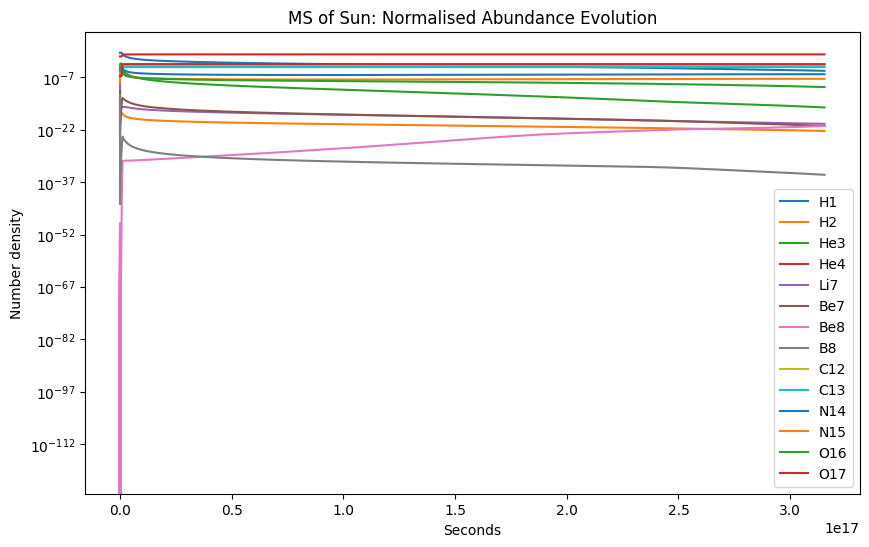

Final Time: 3.154000e+17 Seconds
Final Abundances:
H1: 6.724410e-06
H2: 4.298187e-23
He3: 2.226356e-16
He4: 3.350158e-01
Li7: 4.666631e-21
Be7: 1.102371e-21
Be8: 1.071942e-21
B8: 1.236912e-35
C12: 2.700000e-04
C13: 7.756920e-05
N14: 7.077699e-07
N15: 3.461574e-08
O16: 1.497577e-10
O17: 5.576775e-04


In [6]:

# Present the results.
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for key in elemChart.keys():
    ax.plot(sols.t, sols.y[elemChart[key]]/1e25, label=key)

#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Seconds')
ax.set_ylabel('Number density')
ax.legend()
ax.set_title('MS of Sun: Normalised Abundance Evolution')
plt.show()

# Ensure that the ODE solution exists before trying to access it
if 'sols' in globals() and hasattr(sols, 't') and hasattr(sols, 'y'):
    final_time = sols.t[-1]  # Extract the final time step
    final_values = sols.y[:, -1]/1e25  # Extract the final step values,normalised

    print(f"Final Time: {final_time:.6e} Seconds")
    print("Final Abundances:")
    for element, index in elemChart.items():
        print(f"{element}: {final_values[index]:.6e}")
else:
    print("Error: 'sols' is not properly defined. Ensure solve_ivp has been executed successfully.")

- Plus, it worth working on several key elements that has relatively larger abundance and have contribution to the following periods.

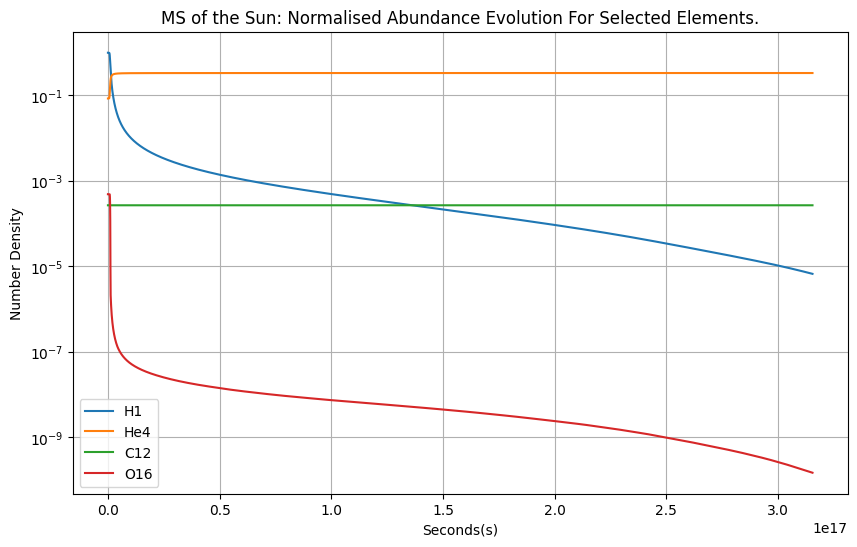

Final Time: 3.154000e+17 Seconds
Final Abundances of Selected Elements:
H1: 6.724410e-06
He4: 3.350158e-01
C12: 2.700000e-04
O16: 1.497577e-10
Final Mass Fractions:
H1: 5.002753e-06
He4: 9.898531e-01
C12: 2.391709e-03
O16: 1.768663e-09


In [7]:
# Ensure that the ODE solution exists before trying to access it
if 'sols' in globals() and hasattr(sols, 't') and hasattr(sols, 'y'):
    # Extract the time steps and the abundance evolution of selected elements
    time_steps = sols.t
    selected_elements = ["H1", "He4", "C12", "O16"]

    # Extract the corresponding abundance evolution data
    abundance_data = {element: sols.y[elemChart[element], :] for element in selected_elements}

    # Plot the abundance evolution for selected elements
    plt.figure(figsize=(10, 6))
    for element in selected_elements:
        plt.plot(time_steps, abundance_data[element]/1e25, label=element)

    plt.xlabel("Seconds(s)")
    plt.ylabel("Number Density")
    #plt.xscale("log")
    plt.yscale("log")  # Use logarithmic scale for better visualization
    plt.title("MS of the Sun: Normalised Abundance Evolution For Selected Elements.")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the final time and the final abundances of selected elements
    final_time = sols.t[-1]
    final_values = sols.y[:, -1]/1e25

    print(f"Final Time: {final_time:.6e} Seconds")
    print("Final Abundances of Selected Elements:")
    for element in selected_elements:
        print(f"{element}: {final_values[elemChart[element]]:.6e}")

else:
    print("Error: 'sols' is not defined. Make sure solve_ivp has been executed successfully.")
    
# Define atomic masses for elements in amu (atomic mass units)
atomic_masses = {
    "H1": 1.00784,
    "H2": 2.014,
    "He3": 3.016,
    "He4": 4.0026,
    "Li7": 7.016,
    "Be7": 7.016,
    "Be8": 8.000,
    "B8": 8.000,
    "C12": 12.000,
    "C13": 13.003,
    "N14": 14.007,
    "N15": 15.000,
    "O16": 15.999,
    "O17": 16.999
}

# Calculate total mass
total_mass = sum(final_values[elemChart[element]] * atomic_masses[element] for element in elemChart)

# Convert number density to mass fraction
mass_fractions = {element: (final_values[elemChart[element]] * atomic_masses[element]) / total_mass for element in elemChart}

# Print the final mass fractions
print("Final Mass Fractions:")
for element in selected_elements:
    print(f"{element}: {mass_fractions[element]:.6e}")